# DFS(Depth-First Search)

- 깊이 우선 탐색
- 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘
- DFS를 설명하기 전에 먼저 그래프의 기본 구조를 알아야 한다.
- 그래프는 노드(Node)와 간선(Edge)으로 표현되며 이때 노드를 정점(Vertex)이라고도 말한다.
- 그래프 탐색이란 하나의 노드를 시작으로 다수의 노드를 방문하는 것을 말한다.
- 또한 두 노드가 간선으로 연결되어 있다면 '두 노드는 인접하다(Adjacent)'라고 표현한다. <br>

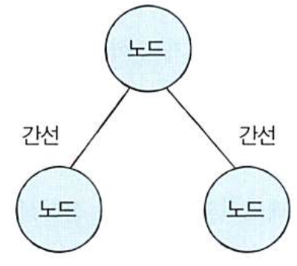

> 인접 행렬(Adjacency Matrix) : 2차원 배열로 그래프의 연결 관계를 표현하는 방식 <br>
> 인접 리스트(Adjacency List) : 리스트로 그래프의 연결 관계를 표현하는 방식



---

## 인접 행렬 방식

- 2차원 배열에 각 노드가 연결된 형태를 기록하는 방식이다.<br>

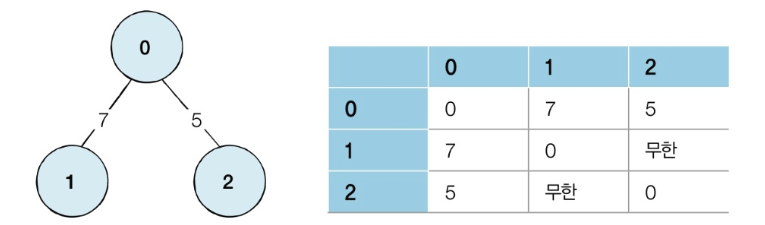

- 위와 같이 연결된 그래프를 인접 행렬로 표현할 때 파이썬에서는 2차원 리스트로 구현할 수 있다.
- 연결이 되어 있지 않은 노드끼리는 무한(Infinify)의 비용이라고 작성한다.
- 실제 코드에서는 논리적으로 정답이 될 수 없는 큰 값 중에서 987654321 등의 값으로 초기화하는 경우가 많다.
- 이렇게 그래프를 인접 행렬 방식으로 처리할 때는 다음과 같이 데이터를 초기화한다.

In [1]:
INF = 999999999 # 무한의 비용 선언

# 2차원 리스트를 이용해 인접 행렬 표현
graph = [
    [0, 7, 5],
    [7, 0, INF],
    [5, INF, 0]
]

print(graph)


[[0, 7, 5], [7, 0, 999999999], [5, 999999999, 0]]


---

## 인접 리스트 방식

- '연결 리스트'라는 자료구조를 이용해 구현한다.
- 파이썬은 기본 자료형인 리스트 자료형이 append()와 메소드를 제공한다.
- 전통적인 프로그래밍 언어에서의 배열과 연결 리스트의 기능을 모두 기본으로 제공한다.
- 파이썬으로 인접 리스트를 이용해 그래프를 표현하고자 할 때에도 단순히 2차원 리스트를 이용하면 된다.
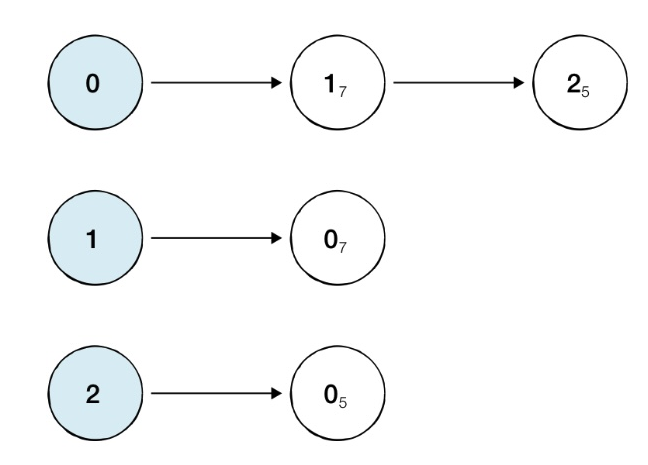

In [2]:
# 행(Row)이 3개인 2차원 리스트로 인접 리스트 표현
graph = [[] for _ in range(3)]

# 노드 0에 연결된 노드 정보 저장 (노드, 거리)
graph[0].append((1, 7))
graph[0].append((2, 5))

# 노드 1에 연결된 노드 정보 저장 (노드, 거리)
graph[1].append((0, 7))

# 노드 2에 연결된 노드 정보 저장 (노드, 거리)
graph[2].append((0, 5))

print(graph)


[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


---

## 인접 행렬 방식과 인접 리스트 방식의 차이점

### 메모리 측면
- 인접 행렬 방식 : 메모리 측면에서 모든 관계를 저장하므로 노드 개수가 많을수록 메모리가 불필요하게 낭비된다.
- 인접 리스트 방식 : 연결된 정보만을 저장하기 때문에 메모리를 효율적으로 사용한다.
- 인접 리스트 방식에서는 연결된 데이터를 하나씩 확인해야 하기 때문에 인접 행렬 방식에 비해 특정한 두 노드가 연결되어 있는지에 대한 정보를 얻는 속도가 느리다.
- 특정한 노드와 연결된 모든 인접 노드를 순회해야 하는 경우, 인접 리스트 방식이 인접 행렬 방식에 비해 메모리 공간의 낭비가 적다.
 
### 시간복잡도 (V: 정점의 개수, E: 간선의 개수)
- 인접행렬: O(V^2)
- 인접리스트: O(|V|+|E|)

---

## 깊이 탐색 알고리즘 DFS

- DFS는 깊이 우선 탐색 알고리즘이다.
- 스택 자료구조에 기초함
- 최대한 멀리 있는 노드를 우선 탐색
- 특정한 경로로 탐색하다가 특정한 상황에서 최대한 깊숙이 들어가서 노드를 방문한 후, 다시 돌아가 다른 경로를 탐색하는 알고리즘
 
> 1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 한다.
> 2.스택의 최상단 노드에 방문하지 않은 인접 노드가 있으면 그 인접 노드를 스택에 넣고 방문 처리를 한다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.
> 3. ⓶번의 과정에서 더 이상 수행할 수 없을 때까지 반복한다.
> - '방문 처리'는 스택에 한 번 삽입되어 처리된 노드가 다시 삽입되지 않게 체크하는 것을 의미한다. 
> - 방문 처리를 함으로써 각 노드를 한 번씩만 처리할 수 있다.

In [3]:
# DFS 함수 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)


1 2 7 6 8 3 4 5 

- 재귀 함수로 DFS를 구현하면 실제 프로그램의 수행 시간이 느려질 수 있다.
- 따라서, 스택 라이브러리를 이용해 시간 복잡도를 완화하는 테크닉이 필요할 때도 있다.

---

# BFS(Breath First Search)

- 너비 우선 탐색 이라는 의미
- 가까운 노드부터 탐색하는 알고리즘
- 선입선출 방식인 큐 자료구조를 이용하는 것이 정석이다.
 
> 1. 탐색 시작 노드를 큐에 삽입하고 방문 처리를 한다.
> 2. 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리를 한다.
> 3. ⓶번의 과정을 더 이상 수행할 수 없을 때까지 반복한다.
인접한 노드를 반복적으로 큐에 넣도록 알고리즘을 작성하면 자연스럽게 먼저 들어온 것이 먼저 나가게 되어, 가까운 노드부터 탐색을 진행하게 된다.

In [4]:
from collections import deque

# BFS 함수 정의
def bfs(graph, start, visited):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        print(v, end=' ')
        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 BFS 함수 호출
bfs(graph, 1, visited)


1 2 3 8 7 4 5 6 

- 코딩테스트에서는 보통 DFS보다는 BFS 구현이 조금 더 빠르게 동작한다는 것을 알아두자.

|-|DFS|BFS|
|:--:|:--:|:--:|
|동작 원리|스택|큐|
|구현 방법|재귀 함수 이용|큐 자료구조 이용|